# Data Assessment & Analytics - Regulatory Data
Notes:
- change os directory location
- be aware of the number of provdied native source data files

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import geoplot as gplt  # for plotting maps and geo-data
import geoplot.crs as gcrs  #used to pull in webdata related to maps and geo-data
import missingno as msno # creates a matrix chart to show missing values
import plotly.express as px
import plotly.graph_objects as go  # for subplot creation
from plotly.subplots import make_subplots  # for subplot creation
import matplotlib.pyplot as mplt  # use with gplt to save fig to pdf

# ---- cleanup ----
import re # string regular expression manipulation
from datetime import datetime # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = os.getcwd() # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: C:\Users\rjame\Documents\WSWC Documents\MappingStatesDataToWaDE2.0\Wyoming\Regulatory


In [3]:
# ---- where to find input files ----
InputFolderString = "G:/Shared drives/WaDE Data/Wyoming/Regulatory"# set this to where input files are located

In [4]:
# Native Input Data
#################################################################
# ---- This needs to be custom per state ----

# Data Set 1: NRCS_-_Conservation_Districts
dfin1 = pd.read_csv(InputFolderString + '/RawInputData/NRCS_-_Conservation_Districts.zip')

In [5]:
# WaDE Processed Input Data
#################################################################

dfru = pd.read_csv(InputFolderString + "/ProcessedInputData/reportingunits.csv").replace(np.nan, "")
dfrupurge = pd.read_csv(InputFolderString + "/ProcessedInputData/reportingunits_missing.csv").replace(np.nan, "")

dfro = pd.read_csv(InputFolderString + "/ProcessedInputData/regulatoryoverlays.csv").replace(np.nan, "")
dfropurge = pd.read_csv(InputFolderString + "/ProcessedInputData/regulatoryoverlays_missing.csv").replace(np.nan, "")

dfs = pd.read_csv(InputFolderString + "/ProcessedInputData/sites.csv").replace(np.nan, "")

# Reporting Unit Info
- reportingunits.csv

In [6]:
print(len(dfru))
dfru.head(1)

35


,ReportingUnitUUID,EPSGCodeCV,ReportingUnitName,ReportingUnitNativeID,ReportingUnitProductVersion,ReportingUnitTypeCV,ReportingUnitUpdateDate,StateCV,Geometry
0,WYre_RUwy1,4326,Campbell County Conservation,wy1,,Conservation Districts,7/30/2023,WY,POLYGON ((-106.01895941400703 43.7119056633044...


<AxesSubplot: >

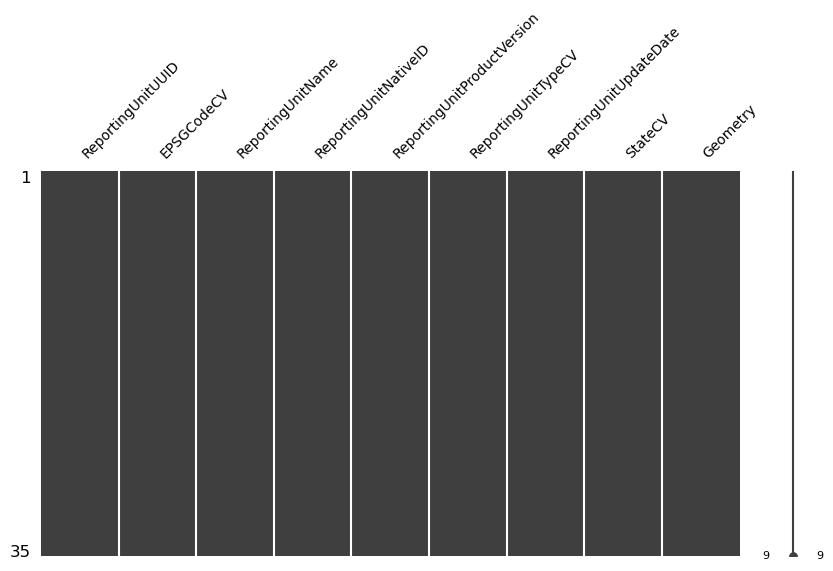

In [7]:
# Check what columns contain missing information.
msno.matrix(dfru, figsize=(10,5), fontsize=10)

In [8]:
# Unique values for 'ReportingUnitName'
for x in dfru['ReportingUnitName'].sort_values().unique():
    print(f'"' + x + '",')

"Campbell County Conservation",
"Clear Creek Conservation",
"Cody Conservation",
"Converse County Conservation",
"Crook County Natural Resource",
"Dubois-Crowheart Conservation",
"Hot Springs Conservation",
"Laramie County Conservation",
"Laramies River Conservation",
"Lincoln Conservation",
"Lingle-Ft. Laramie Conservation",
"Little Snake River Conservation",
"Lower Wind River Conservation",
"Medicine Bow Conservation",
"Meeteetse Conservation",
"Natrona County Conservation",
"Niobrara Conservation",
"North Platte Conservation",
"Platte County Resource",
"Popo Agie Conservation",
"Powder River Conservation",
"Powell-Clarks Fork Conservation",
"Saratoga-Encampment-Rawlins Conservation",
"Sheridan County Conservation",
"Shoshone Conservation",
"South Big Horn Conservation",
"South Goshen Conservation",
"Star Valley Conservation",
"Sublette County Conservation",
"Sweetwater County Conservation",
"Teton Conservation",
"Uinta County Conservation",
"Washakie County Conservation",
"Weston Co

In [9]:
# Unique values for 'ReportingUnitNativeID'
for x in dfru['ReportingUnitNativeID'].sort_values().unique():
    print(f'"' + x + '",')

"wy1",
"wy10",
"wy11",
"wy12",
"wy13",
"wy14",
"wy15",
"wy16",
"wy17",
"wy18",
"wy19",
"wy2",
"wy20",
"wy21",
"wy22",
"wy23",
"wy24",
"wy25",
"wy26",
"wy27",
"wy28",
"wy29",
"wy3",
"wy30",
"wy31",
"wy32",
"wy33",
"wy34",
"wy35",
"wy4",
"wy5",
"wy6",
"wy7",
"wy8",
"wy9",


In [10]:
# Unique values for 'ReportingUnitTypeCV'
for x in dfru['ReportingUnitTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Conservation Districts",


# Regulatory Overlay Info
- regulatoryoverlays.csv

In [11]:
print(len(dfro))
dfro.head(1)

35


,RegulatoryOverlayUUID,OversightAgency,RegulatoryDescription,RegulatoryName,RegulatoryOverlayNativeID,RegulatoryStatusCV,RegulatoryStatute,RegulatoryStatuteLink,StatutoryEffectiveDate,StatutoryEndDate,RegulatoryOverlayTypeCV,WaterSourceTypeCV
0,WYre_RO1,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Campbell County Conservation,1,Active,,,1941-03-01,,Conservation District,Surface and Groundwater


<AxesSubplot: >

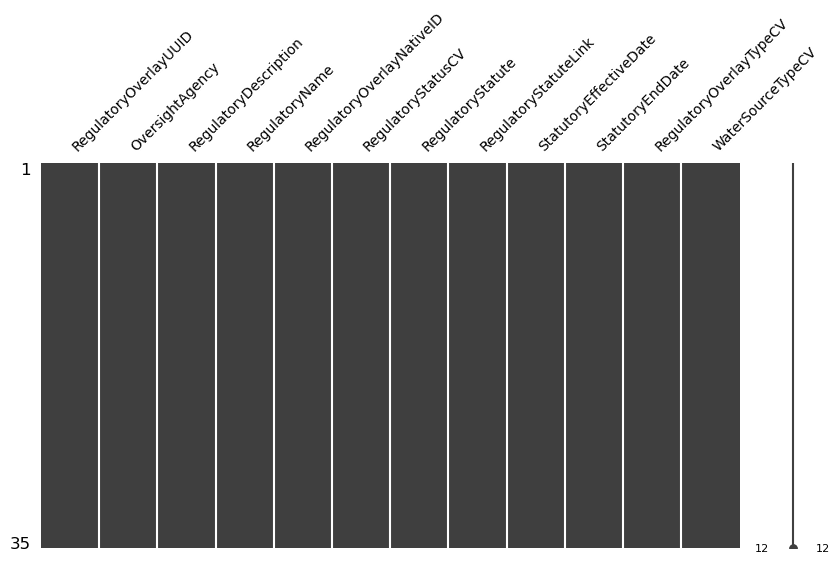

In [12]:
# Check what columns contain missing information.
msno.matrix(dfro, figsize=(10,5), fontsize=10)

In [13]:
# Unique values for 'OversightAgency'
for x in dfro['OversightAgency'].sort_values().unique():
    print(f'"' + x + '",')

"Wyoming Association of Conservation Districts",


In [14]:
# Unique values for 'RegulatoryName'
for x in dfro['RegulatoryName'].sort_values().unique():
    print(f'"' + x + '",')

"Campbell County Conservation",
"Clear Creek Conservation",
"Cody Conservation",
"Converse County Conservation",
"Crook County Natural Resource",
"Dubois-Crowheart Conservation",
"Hot Springs Conservation",
"Laramie County Conservation",
"Laramies River Conservation",
"Lincoln Conservation",
"Lingle-Ft. Laramie Conservation",
"Little Snake River Conservation",
"Lower Wind River Conservation",
"Medicine Bow Conservation",
"Meeteetse Conservation",
"Natrona County Conservation",
"Niobrara Conservation",
"North Platte Conservation",
"Platte County Resource",
"Popo Agie Conservation",
"Powder River Conservation",
"Powell-Clarks Fork Conservation",
"Saratoga-Encampment-Rawlins Conservation",
"Sheridan County Conservation",
"Shoshone Conservation",
"South Big Horn Conservation",
"South Goshen Conservation",
"Star Valley Conservation",
"Sublette County Conservation",
"Sweetwater County Conservation",
"Teton Conservation",
"Uinta County Conservation",
"Washakie County Conservation",
"Weston Co

In [15]:
# Unique values for 'RegulatoryOverlayNativeID'
for x in dfro['RegulatoryOverlayNativeID'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

"1",
"10",
"11",
"12",
"13",
"14",
"15",
"16",
"17",
"18",
"19",
"2",
"20",
"21",
"22",
"23",
"24",
"25",
"26",
"27",
"28",
"29",
"3",
"30",
"31",
"32",
"33",
"34",
"35",
"4",
"5",
"6",
"7",
"8",
"9",


In [16]:
# Unique values for 'RegulatoryOverlayTypeCV'
for x in dfro['RegulatoryOverlayTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Conservation District",


In [17]:
# Unique values for 'WaterSourceTypeCV'
for x in dfro['WaterSourceTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Surface and Groundwater",


# Site Info (related to Overlays)
- sites.csv

In [18]:
print(len(dfs))
dfs.head(1)

71590


,SiteUUID,RegulatoryOverlayUUIDs,WaterSourceUUIDs,CoordinateAccuracy,CoordinateMethodCV,County,EPSGCodeCV,Geometry,GNISCodeCV,HUC12,HUC8,Latitude,Longitude,NHDNetworkStatusCV,NHDProductCV,PODorPOUSite,SiteName,SiteNativeID,SitePoint,SiteTypeCV,StateCV,USGSSiteID,WaterSourceUUID,WaterSourceTypeCV
0,WYwr_SwadeID1,WYre_RO18,WYwr_WSwadeID1,WaDE Unspecified,WaDE Unspecified,WaDE Unspecified,4326,,,,,42.91290,-104.46127,,,POD,O W Well #1,wadeID1,,Well,WY,,WYwr_WSwadeID1,Groundwater


## Num of Record Summary

In [31]:
print(f"Num of Source Entries (rows): ", len(dfin1))
print(f"Num of Identified Reporting Units: ", len(dfru))
print(f"Num of Identified Regulatory Overlays: ", len(dfro))

Num of Source Entries (rows):  35
Num of Identified Reporting Units:  35
Num of Identified Regulatory Overlays:  35


## Why Removed Records Summary

In [19]:
print("---- Reasons why records were removed from reporting unit source info ----")
if len(dfrupurge) != 0:
    print(dfrupurge['ReasonRemoved'].value_counts())
else:
    print("...nothing removed.")

---- Reasons why records were removed from reporting unit source info ----
...nothing removed.


In [20]:
print(" ---- Reasons why records were removed from regula toryoverlays info ---- ")
if len(dfropurge) != 0:
    print(dfropurge['ReasonRemoved'].value_counts())
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from regula toryoverlays info ---- 
...nothing removed.


## Figures

In [30]:
# ReportingUnitName: histogram distribution of WaDE values
print(dfru.ReportingUnitName.value_counts())

fig = px.histogram(dfru, x="ReportingUnitName")
fig.update_layout(bargap=0.2,
                  title="Histogram of ReportingUnitName Entries in reportingunits.csv",
                  xaxis_title="ReportingUnitName Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/ReportingUnitName.png', engine="kaleido")

Little Snake River Conservation             2
Campbell County Conservation                1
Washakie County Conservation                1
Star Valley Conservation                    1
Cody Conservation                           1
Sublette County Conservation                1
Sweetwater County Conservation              1
Teton Conservation                          1
Uinta County Conservation                   1
Weston County Natural Resource              1
South Big Horn Conservation                 1
Converse County Conservation                1
Crook County Natural Resource               1
Dubois-Crowheart Conservation               1
Hot Springs Conservation                    1
Laramie County Conservation                 1
South Goshen Conservation                   1
Shoshone Conservation                       1
Lincoln Conservation                        1
Sheridan County Conservation                1
Saratoga-Encampment-Rawlins Conservation    1
Powell-Clarks Fork Conservation   

In [22]:
# ReportingUnitTypeCV: histogram distribution of WaDE values
print(dfru.ReportingUnitTypeCV.value_counts())

fig = px.histogram(dfru, x="ReportingUnitTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of ReportingUnitTypeCV Entries in reportingunits.csv",
                  xaxis_title="ReportingUnitTypeCV Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/ReportingUnitTypeCV.png', engine="kaleido")

Conservation Districts    35
Name: ReportingUnitTypeCV, dtype: int64


In [23]:
# OversightAgency: histogram distribution of WaDE values
print(dfro.OversightAgency.value_counts())

fig = px.histogram(dfro, x="OversightAgency")
fig.update_layout(bargap=0.2,
                  title="Histogram of OversightAgency Entries in regulatoryoverlays.csv",
                  xaxis_title="OversightAgency Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/OversightAgency.png', engine="kaleido")

Wyoming Association of Conservation Districts    35
Name: OversightAgency, dtype: int64


In [24]:
# RegulatoryName: histogram distribution of WaDE values
print(dfro.RegulatoryName.value_counts())

fig = px.histogram(dfro, x="RegulatoryName")
fig.update_layout(bargap=0.2,
                  title="Histogram of RegulatoryName Entries in regulatoryoverlays.csv",
                  xaxis_title="RegulatoryName Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/RegulatoryName.png', engine="kaleido")

Little Snake River Conservation             2
Campbell County Conservation                1
South Big Horn Conservation                 1
Powder River Conservation                   1
Powell-Clarks Fork Conservation             1
Saratoga-Encampment-Rawlins Conservation    1
Sheridan County Conservation                1
Shoshone Conservation                       1
South Goshen Conservation                   1
Platte County Resource                      1
Star Valley Conservation                    1
Sublette County Conservation                1
Sweetwater County Conservation              1
Teton Conservation                          1
Uinta County Conservation                   1
Washakie County Conservation                1
Popo Agie Conservation                      1
North Platte Conservation                   1
Clear Creek Conservation                    1
Niobrara Conservation                       1
Natrona County Conservation                 1
Meeteetse Conservation            

In [25]:
# RegulatoryOverlayTypeCV: histogram distribution of WaDE values
print(dfro.RegulatoryOverlayTypeCV.value_counts())

fig = px.histogram(dfro, x="RegulatoryOverlayTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of RegulatoryOverlayTypeCV Entries in regulatoryoverlays.csv",
                  xaxis_title="RegulatoryOverlayTypeCV Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/RegulatoryOverlayTypeCV.png', engine="kaleido")

Conservation District    35
Name: RegulatoryOverlayTypeCV, dtype: int64


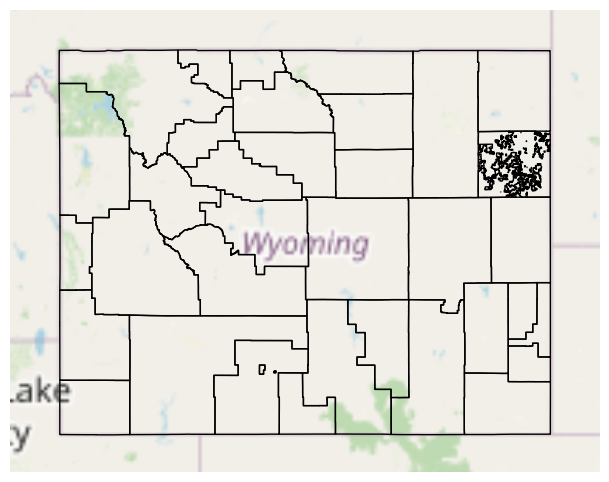

In [27]:
# Map poly info

dfruPoly = dfru.copy()
dfruPoly = dfruPoly[dfruPoly['Geometry'] != ""].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot

    dfruPoly['Geometry'] = gpd.GeoSeries.from_wkt(dfruPoly['Geometry'], crs="EPSG:4326")
    gdfruPoly = gpd.GeoDataFrame(dfruPoly, geometry=dfruPoly['Geometry'], crs="EPSG:4326") # covert to geodataframe
    #gdfruPoly['Geometry'] = gdfruPoly.simplify(0.001) # simplify the geometry. Lower the number the larger the exported file.
    gplt.polyplot(gdfruPoly, ax=ax)
    mplt.savefig(format="png", fname='figures/ReportingUnitMap.png') 
except:
    print('No geometry data to plot')

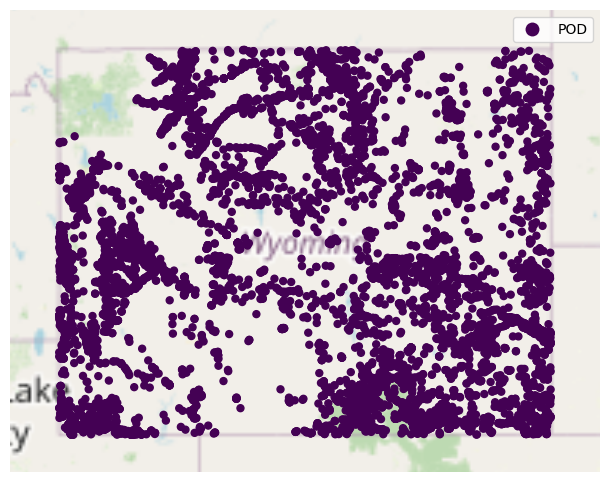

In [28]:
# map the site info (this would be lat & long Points only)

dfsPoint = dfs.copy()
dfsPoint = dfsPoint[dfsPoint['RegulatoryOverlayUUIDs'] != ""]
    
try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot
    
    gdfsPoint = gpd.GeoDataFrame(dfsPoint, geometry=gpd.points_from_xy(dfsPoint.Longitude.astype(float), dfsPoint.Latitude.astype(float)), crs="EPSG:4326")
    gplt.pointplot(gdfsPoint, hue='PODorPOUSite', legend=True, legend_var='hue', ax=ax)
    mplt.savefig(format="png", fname='figures/PointInRegMap.png') 
    
except:
    print('No point data to plot')

# Custom Queries and Analysis for this Dataset

In [29]:
# asdf